In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print("tf version:", tf.__version__)

2022-11-15 11:41:33.454630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf version: 2.10.0


above image is a Ankle boot


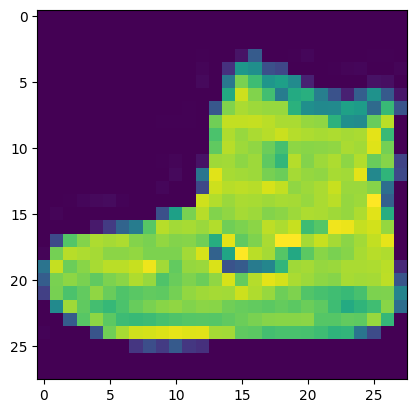

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# escalar valores de entrada a rango 0-1

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

plt.imshow(train_images[0])
print("above image is a", class_names[train_labels[0]])


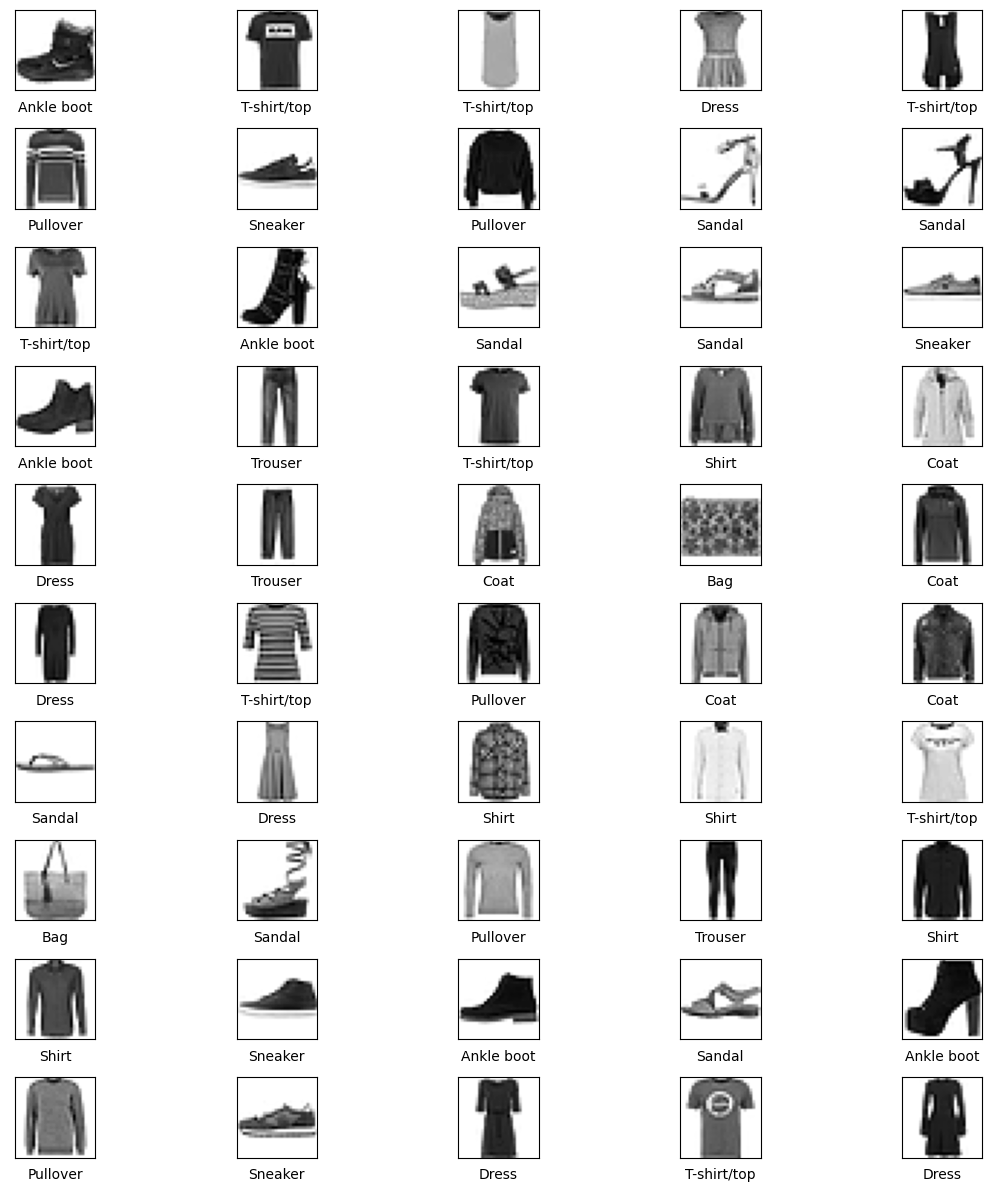

In [4]:

plt.figure(figsize=(12,12))

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.tight_layout(pad=1.0)
plt.show()

Arriba era la preparación de los datos. Ahora vamos a definir el modelo

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


2022-11-15 11:41:39.997659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Accuracy:", test_acc)

predictions = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.9777 - accuracy: 0.7487
Epoch 2/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.5394 - accuracy: 0.8268
Epoch 3/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.4675 - accuracy: 0.8405
Epoch 4/5
1875/1875 [==============================] - 2s 927us/step - loss: 0.4359 - accuracy: 0.8478
Epoch 5/5
313/313 [==============================] - 0s 752us/step - loss: 0.4664 - accuracy: 0.8342
Accuracy: 0.8342000246047974
313/313 [==============================] - 0s 609us/step


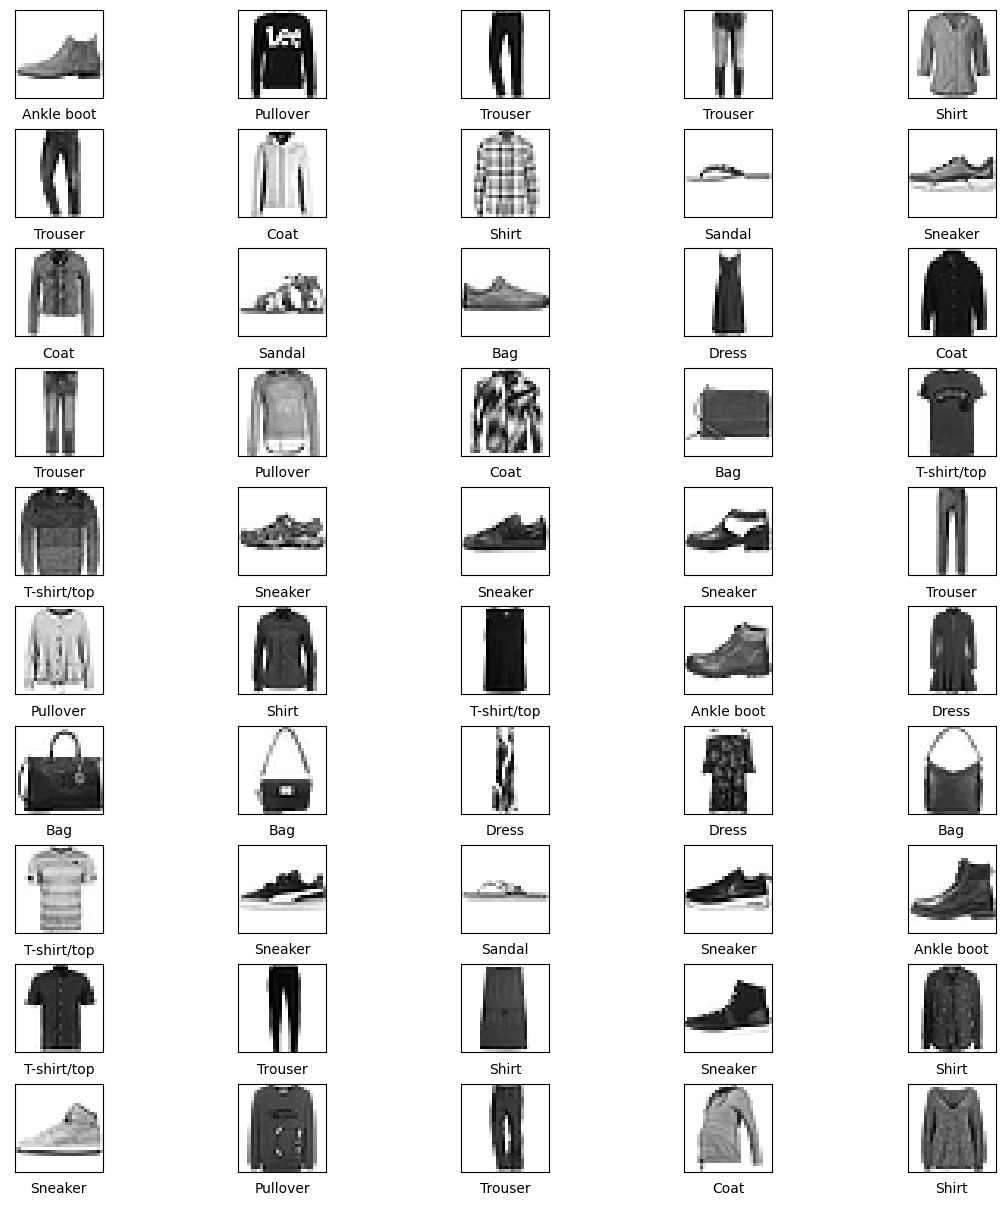

In [8]:
plt.figure(figsize=(12,12))

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])

plt.tight_layout(pad=0.5)
plt.show()

Voy a probar con una imagen cualquiera sacada de internet

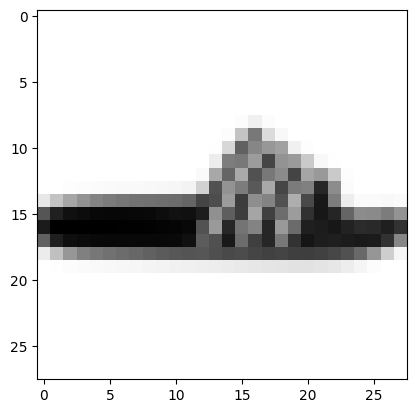

In [13]:
import numpy as np
from skimage import io
from skimage.transform import resize

img_url = "https://www.forumsport.com/medias/medias-1000545871-00-P-X-20190108100410.jpg?context=bWFzdGVyfGltYWdlc3w5NTczM3xpbWFnZS9qcGVnfGltYWdlcy9oMTUvaGVjLzg5OTgzMjA5OTYzODIuanBnfGI5ZDgxOTcxZWJkNDNlN2Q3MDQ0Mzc5NGQxYmY5ZTk0Y2U0YTQzOGViODI0MTkzZjk2M2E2ZTUxYWIzNDg3ZDU"
#img_url = "https://www.uniqlo.com/jp/ja/contents/feature/masterpiece/common_22ss/img/products/contentsArea_itemimg_16.jpg"
#img_url = "https://assets.vogue.com/photos/605a14c3426adb8111bccfb1/1:1/w_1013,h_1013,c_limit/slide_16.jpg"
#img_url = "https://www.unisa-europa.com/uploads/botines-kinton-ns-black-b8dda.jpg"
image = io.imread(img_url, as_gray=True)
image = resize(image, (28, 28))

# imagen ya está cargada como floats
array = 1-(np.array(image).astype('float32'))
#array = image #1-(np.array(image).astype('float32') / 255.0)

plt.imshow(array, cmap=plt.cm.binary)

In [14]:
print("Accuracy:", test_acc)

img_input = np.array([array])

print("shape", img_input.shape)

predictions = model.predict(img_input)

print("above image is", class_names[np.argmax(predictions[0])])
print("probabilities", predictions[0])
print("sum of predictions", np.sum(predictions[0]))

Accuracy: 0.8342000246047974
shape (1, 28, 28)
1/1 [==============================] - 0s 21ms/step
above image is Sandal
probabilities [1.08115826e-04 5.80930682e-05 1.11824239e-03 1.29177861e-04
 2.19766182e-04 8.86688411e-01 2.94642232e-04 7.78958425e-02
 2.50173151e-03 3.09859049e-02]
sum of predictions 0.99999994
